In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [13]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data/', train=True, download=True, transform=transform)
trainloader =  torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
import matplotlib.pyplot as plt
import numpy as np

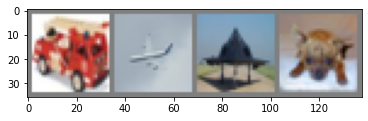

truck plane plane dog  


In [16]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(" ".join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

2. Define a Convolutional Neural Network

In [17]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

3. Define a Loss function and optimizer

In [19]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9)

4. Train the network

In [48]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.126
[1,  4000] loss: 1.152
[1,  6000] loss: 1.132
[1,  8000] loss: 1.151
[1, 10000] loss: 1.171
[1, 12000] loss: 1.142
[2,  2000] loss: 1.149
[2,  4000] loss: 1.145
[2,  6000] loss: 1.148
[2,  8000] loss: 1.143
[2, 10000] loss: 1.157
[2, 12000] loss: 1.133
[3,  2000] loss: 1.148
[3,  4000] loss: 1.160
[3,  6000] loss: 1.140
[3,  8000] loss: 1.138
[3, 10000] loss: 1.146
[3, 12000] loss: 1.146
[4,  2000] loss: 1.122
[4,  4000] loss: 1.143
[4,  6000] loss: 1.139
[4,  8000] loss: 1.159
[4, 10000] loss: 1.162
[4, 12000] loss: 1.148
[5,  2000] loss: 1.134
[5,  4000] loss: 1.138
[5,  6000] loss: 1.153
[5,  8000] loss: 1.164
[5, 10000] loss: 1.146
[5, 12000] loss: 1.142
[6,  2000] loss: 1.135
[6,  4000] loss: 1.168
[6,  6000] loss: 1.153
[6,  8000] loss: 1.134
[6, 10000] loss: 1.141
[6, 12000] loss: 1.141
[7,  2000] loss: 1.147
[7,  4000] loss: 1.140
[7,  6000] loss: 1.148
[7,  8000] loss: 1.146
[7, 10000] loss: 1.156
[7, 12000] loss: 1.139
[8,  2000] loss: 1.138
[8,  4000] 

In [42]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

5. Test the network on the test data

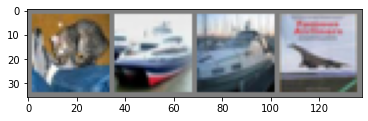

GrounTruth:  cat   ship  ship  plane


In [43]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GrounTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [44]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [45]:
outputs = net(images)

In [46]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  cat   car   ship  ship 


In [47]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 56 %


Training on GPU

In [49]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [50]:
print(device)

cpu


In [56]:
inputs[0].cuda()

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx